# About this dataframe
## Context
Recorded crime for the Police Force Areas of England and Wales.
The data are rolling 12-month totals, with points at the end of each financial year between year ending March 2003 to March 2007 and at the end of each quarter from June 2007.

## Content
The data are a single .csv file with comma-separated data.
It has the following attributes:

12 months ending: the end of the financial year.

PFA: the Police Force Area.

Region: the region that the criminal offence took place.

Offence: the name of the criminal offence.

Rolling year total number of offences: the number of occurrences of a given offence in the last year.

## Source:
https://www.kaggle.com/r3w0p4/recorded-crime-data-at-police-force-area-level

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Reading the dataset

In [4]:
df = pd.read_csv("rec-crime-pfa.csv")
df.head()

,12 months ending,PFA,Region,Offence,Rolling year total number of offences
0,31/03/2003,Avon and Somerset,South West,All other theft offences,25959
1,31/03/2003,Avon and Somerset,South West,Bicycle theft,3090
2,31/03/2003,Avon and Somerset,South West,Criminal damage and arson,26202
3,31/03/2003,Avon and Somerset,South West,Death or serious injury caused by illegal driving,2
4,31/03/2003,Avon and Somerset,South West,Domestic burglary,14561


# Change the Column names for convinience

In [5]:
mapper = {"Rolling year total number of offences":"num_offence",
         "Offence":"type_offence",
         "12 months ending":"date"}
df.rename(columns = mapper, inplace=True)

# General Overview of Dataset

In [6]:
print("The number of Features: {}".format(df.shape[1]))
print("The number of Observations: {}".format(df.shape[0]))

The number of Features: 5
The number of Observations: 46469


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46469 entries, 0 to 46468
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          46469 non-null  object
 1   PFA           46469 non-null  object
 2   Region        46469 non-null  object
 3   type_offence  46469 non-null  object
 4   num_offence   46469 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [8]:
df.describe()

,num_offence
count,46469.00000
mean,5266.32654
std,12915.68672
min,-120.00000
25%,549.00000
50%,2011.00000
75%,5600.00000
max,308901.00000


## There is no Null values in this Dataset

In [9]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)

# Unique Values

In [10]:
df.index.unique()

DatetimeIndex(['2003-03-31', '2004-03-31', '2005-03-31', '2006-03-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-30',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [14]:
df.Region.unique()

array(['South West', 'East', 'British Transport Police', 'North West',
       'London', 'North East', 'East Midlands', 'Wales', 'South East',
       'Yorkshire and The Humber', 'West Midlands', 'Fraud: Action Fraud',
       'Fraud: CIFAS', 'Fraud: UK Finance'], dtype=object)

In [19]:
df.PFA.unique()

array(['Avon and Somerset', 'Bedfordshire', 'British Transport Police',
       'Cambridgeshire', 'Cheshire', 'City of London', 'Cleveland',
       'Cumbria', 'Derbyshire', 'Devon and Cornwall', 'Dorset', 'Durham',
       'Dyfed-Powys', 'Essex', 'Gloucestershire', 'Greater Manchester',
       'Gwent', 'Hampshire', 'Hertfordshire', 'Humberside', 'Kent',
       'Lancashire', 'Leicestershire', 'Lincolnshire', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire', 'Action Fraud',
       'CIFAS', 'UK Finance'], dtype=object)

In [97]:
df.type_offence.unique()

array(['All other theft offences', 'Bicycle theft',
       'Criminal damage and arson',
       'Death or serious injury caused by illegal driving',
       'Domestic burglary', 'Drug offences', 'Fraud offences', 'Homicide',
       'Miscellaneous crimes against society', 'Non-domestic burglary',
       'Possession of weapons offences', 'Public order offences',
       'Robbery', 'Sexual offences', 'Shoplifting',
       'Stalking and harassment', 'Theft from the person',
       'Vehicle offences', 'Violence with injury',
       'Violence without injury', 'Action Fraud', 'CIFAS', 'UK Finance',
       'Non-residential burglary', 'Residential burglary'], dtype=object)

# We only consider the data after the year 2007

In [11]:
df = df.loc[df.index>"01-01-2007"]

In [12]:
df.loc[df.index.month == 3, "season"] = "Winter"
df.loc[df.index.month == 6, "season"] = "Summer"
df.loc[df.index.month == 9, "season"] = "Spring"
df.loc[df.index.month == 12, "season"] = "Fall"
df["year"] = df.index.year

In [13]:
df.head()

,PFA,Region,type_offence,num_offence,season,year
date,,,,,,
2007-03-31,Avon and Somerset,South West,All other theft offences,22232,Winter,2007
2007-03-31,Avon and Somerset,South West,Bicycle theft,4311,Winter,2007
2007-03-31,Avon and Somerset,South West,Criminal damage and arson,33247,Winter,2007
2007-03-31,Avon and Somerset,South West,Death or serious injury caused by illegal driving,6,Winter,2007
2007-03-31,Avon and Somerset,South West,Domestic burglary,7450,Winter,2007


# Main Analysis

## Seasonal Crimes Analysis

In [47]:
df_ys = pd.crosstab(index = df.year, columns = df.season,
                    values = df.num_offence, aggfunc = "mean",
                    margins = True, margins_name = "mean")
df_ys.head(15)

season,Fall,Spring,Summer,Winter,mean
year,,,,,
2007,5742.145455,5924.438636,6058.405682,6167.679545,5973.167330
2008,5441.655682,5497.645455,5534.631818,5627.587500,5525.380114
2009,5053.965909,5175.290909,5289.309091,5343.973864,5215.634943
2010,4727.175000,4799.152273,4849.771591,4929.880682,4826.494886
2011,4911.044168,4816.805210,4747.727067,4716.950000,4798.200623
2012,4691.195923,4747.531144,4837.595696,4960.344281,4809.166761
2013,4531.245753,4555.392978,4576.566251,4602.005663,4566.302661
2014,4462.672060,4872.171633,4835.563766,4801.497020,4735.813879
2015,4769.329018,4666.523193,4590.318231,4495.530744,4630.425297


## As is shown, The mean amount of crime in different seasons are almost the same.

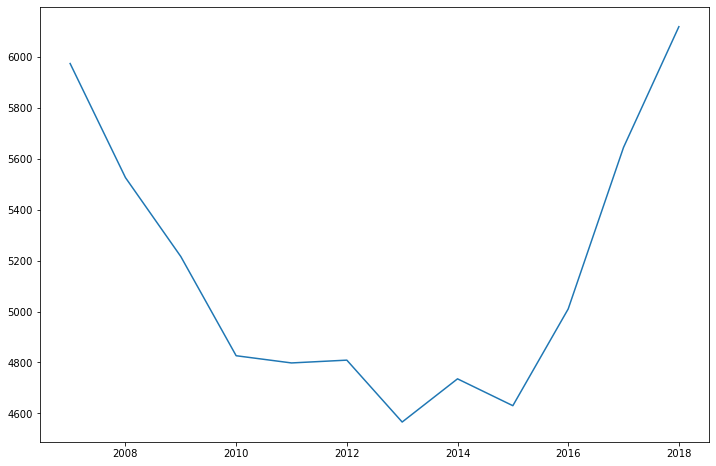

In [74]:
plt.figure(figsize = [12,8])
plt.plot(df_ys.drop(index = 'mean').index,
         df_ys.drop(index = 'mean').loc[:,"mean"])

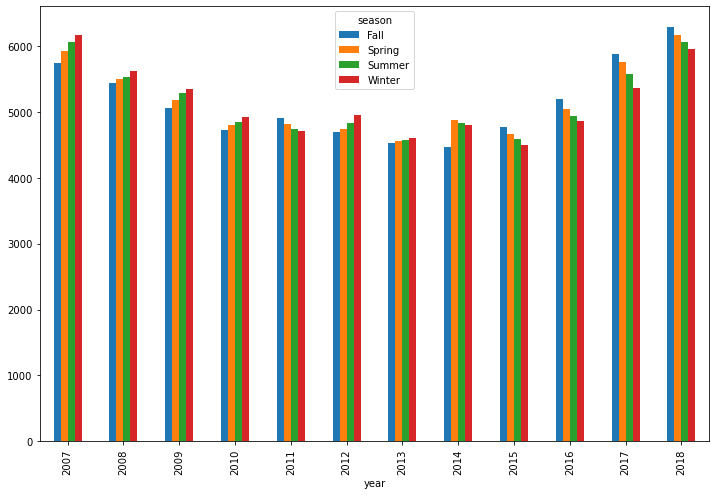

In [28]:
df.groupby(["year","season"]).num_offence.mean().unstack().\
                                plot(kind = "bar", figsize = [12,8]);

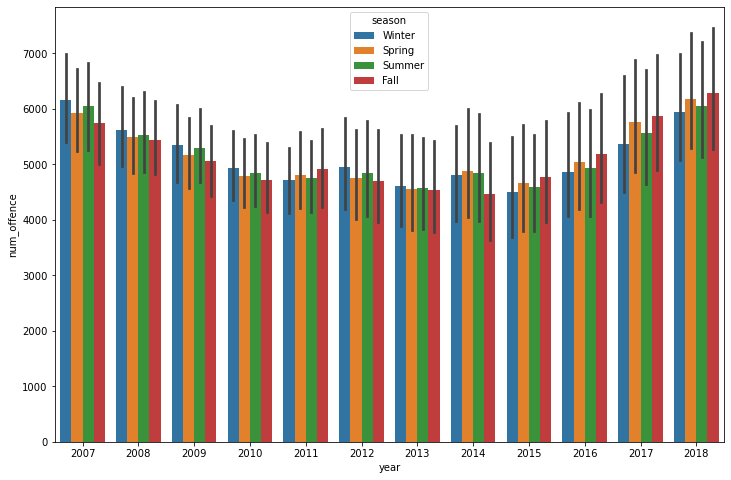

In [36]:
hue_order = ["Winter", "Spring", "Summer", "Fall"]
plt.figure(figsize = [12,8])
sns.barplot(data = df, x = 'year', y = "num_offence",
            hue = "season", dodge = True, hue_order = hue_order,);

## As is shown, the average number of crimes during the years 2007 and 2018 sunk from nearly 6000 to 4600 in 2013 and it increases up to more than 6000 again in 2018.

# Regional Crime Analysis over the Years

In [83]:
df_yr = pd.crosstab(index = df.year, columns = df.Region,
                    values = df.num_offence, aggfunc = "mean",
                    margins = True, margins_name = "mean")
df_yr.head(15)

Region,British Transport Police,East,East Midlands,Fraud: Action Fraud,Fraud: CIFAS,Fraud: UK Finance,London,North East,North West,South East,South West,Wales,West Midlands,Yorkshire and The Humber,mean
year,,,,,,,,,,,,,,,
2007,3703.300000,3723.168750,4252.470000,NaN,NaN,NaN,22670.218750,4021.233333,7140.402500,7230.780000,4229.927500,3142.612500,6174.662500,6958.978125,5973.167330
2008,3335.137500,3413.368750,3987.060000,NaN,NaN,NaN,21583.075000,3625.133333,6512.150000,6678.705000,3900.855000,3020.128125,5600.093750,6346.271875,5525.380114
2009,3139.037500,3223.766667,3749.945000,NaN,NaN,NaN,21189.375000,3268.341667,6038.445000,6342.225000,3673.595000,2912.506250,5167.143750,5870.718750,5215.634943
2010,2952.812500,3028.735417,3349.467500,NaN,NaN,NaN,20845.431250,2830.570833,5393.305000,5878.355000,3337.777500,2666.565625,4890.975000,5258.321875,4826.494886
2011,2842.450000,2957.647917,3091.600000,19594.000000,109994.000000,66364.333333,20653.375000,2645.283333,5082.885000,5616.910000,3234.345000,2479.846875,4766.390625,5091.956250,4798.200623
2012,2588.337500,2774.395833,2848.015000,66947.750000,235808.000000,119301.000000,20146.943750,2442.945833,4711.360000,5140.162500,3103.300000,2304.775000,4311.228125,4721.559375,4809.166761
2013,2564.875000,2566.802083,2607.825000,162752.000000,209494.500000,98270.750000,18600.150000,2324.800000,4454.157500,4791.587500,2849.700000,2175.137500,3986.971875,4442.806250,4566.302661
2014,2441.756410,2676.967949,2668.415385,214352.500000,235833.250000,110278.250000,18011.294872,2428.196581,4677.038462,4834.848718,2858.374359,2264.240385,4101.586538,4473.804487,4735.813879
2015,2133.238095,2667.408730,2544.726190,231546.250000,275910.500000,95986.750000,17154.964286,2476.607143,4603.664286,4790.107143,2711.840476,2184.398810,4010.264881,4439.252976,4630.425297


## We should Ommit Three columns namely, Fraud: Action Fraud, Fraud: CIFAS,	Fraud: UK Finance, Because these parts are related to the type of offence, not the region of the crime!!

<AxesSubplot:xlabel='year'>

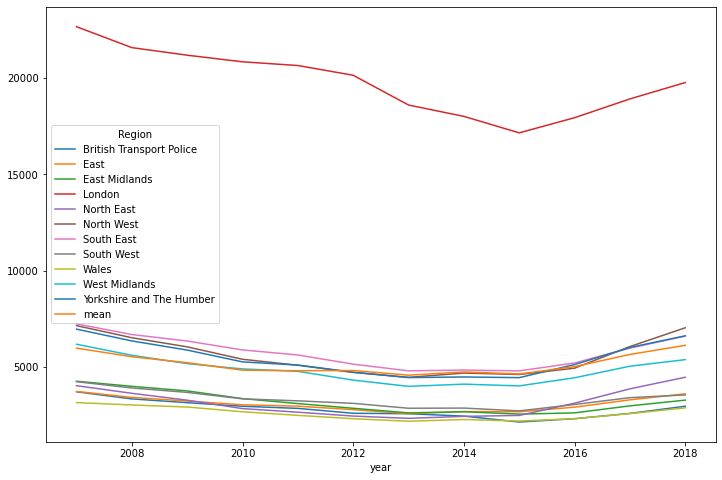

In [93]:
df_yr.drop(columns = ['Fraud: Action Fraud','Fraud: CIFAS', 'Fraud: UK Finance'],
          index = 'mean').plot(figsize = [12,8])

## Among all regions Action Fraud and CIFAS have been significantly rose during the years 2011 and 2018. The rest of regions saw a slight decrease and then increase.
## Another fact about this plot is that the most criminal region in the whole analyzed area is London. The amount of crime in the other regions of UK is pretty much the same.

# Type of Offence Analysis Over the Years

In [96]:
df_yt = pd.crosstab(index = df.year, columns = df.type_offence,
                    values = df.num_offence, aggfunc = "mean",
                    margins = True, margins_name = "mean")
df_yt.head(15)

type_offence,Action Fraud,All other theft offences,Bicycle theft,CIFAS,Criminal damage and arson,Death or serious injury caused by illegal driving,Domestic burglary,Drug offences,Fraud offences,Homicide,...,Robbery,Sexual offences,Shoplifting,Stalking and harassment,Theft from the person,UK Finance,Vehicle offences,Violence with injury,Violence without injury,mean
year,,,,,,,,,,,,,,,,,,,,,
2007,NaN,16231.357955,2477.147727,NaN,25601.227273,10.471591,6507.647727,4712.357955,2057.090909,17.517045,...,2187.062500,1223.687500,6729.289773,1290.971591,2534.187500,NaN,16526.823864,10969.681818,5606.818182,5973.167330
2008,NaN,15363.943182,2346.664773,NaN,22582.937500,9.545455,6397.823864,5404.869318,1637.431818,16.431818,...,1856.215909,1172.193182,6774.869318,1199.806818,2163.090909,NaN,14438.840909,9939.755682,5423.227273,5525.380114
2009,NaN,13706.448864,2490.715909,NaN,20425.460227,11.414773,6405.039773,5447.295455,1647.698864,14.562500,...,1791.130682,1150.738636,7318.210227,1177.715909,2069.778409,NaN,12639.840909,9468.818182,5421.522727,5215.634943
2010,NaN,13676.892045,2469.727273,NaN,17082.085227,11.255682,5977.994318,5330.062500,1656.619318,14.278409,...,1703.232955,1216.948864,6954.267045,1271.607955,2071.471591,NaN,10791.306818,8791.784091,5539.545455,4826.494886
2011,19594.000000,14450.244318,2523.965909,109994.000000,15161.573864,9.852273,5766.045455,5299.034091,1636.125000,13.965909,...,1749.448864,1222.113636,6917.340909,1150.142045,2188.857955,66364.333333,9930.227273,8053.829545,5453.181818,4798.200623
2012,66947.750000,13535.198864,2451.312500,235808.000000,13279.045455,8.517045,5386.886364,5014.164773,1707.119318,12.585227,...,1604.346591,1177.204545,6900.539773,1197.312500,2345.585227,119301.000000,9158.409091,7407.130682,5378.977273,4809.166761
2013,162752.000000,12094.147727,2204.801136,209494.500000,11841.051136,9.034091,5062.323864,4645.051136,751.323864,12.539773,...,1413.562500,1305.761364,7039.840909,1301.386364,2468.852273,98270.750000,8702.329545,7086.829545,5327.420455,4566.302661
2014,214352.500000,11457.306818,2180.448864,235833.250000,11385.227273,11.414773,4685.795455,4306.789773,NaN,11.795455,...,1242.784091,1624.482955,7337.244318,1598.414773,2017.602273,110278.250000,8223.318182,7774.852273,6185.585227,4735.813879
2015,231546.250000,11138.676136,2060.664773,275910.500000,11743.630682,13.829545,4420.823864,3647.545455,NaN,12.784091,...,1145.698864,2200.335227,7501.363636,2520.977273,1814.829545,95986.750000,8084.590909,8995.869318,7942.607955,4630.425297


## Since there are some Null Values in each column, we consider backward fill value method here.
## Moreover, Three columns of Action Fraud, CIFAS and UK Finance are also seperated, since the amount of these crimes are much more than the rest and their analysis cannot be shown in the plot vividly.

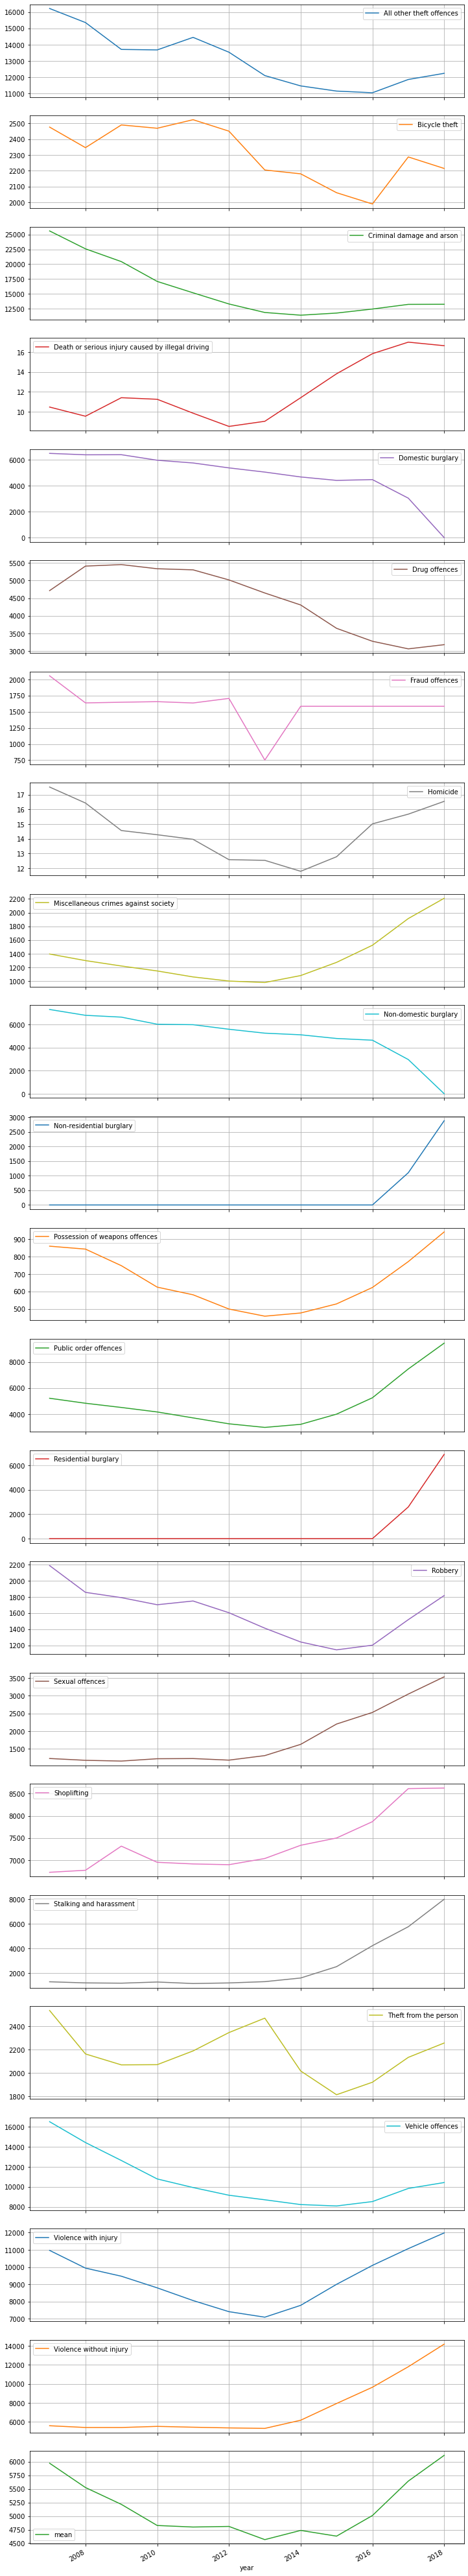

In [122]:
blocked_list = ["Action Fraud","CIFAS","UK Finance"]
df_yt.fillna(method = "bfill").drop(columns = blocked_list, index = 'mean').\
                                plot(figsize = [12,80], subplots = True,grid = True);

## Most highlights during the years 2007 to 2018:

1) Bicycle Theft: has decreased from 2500 in 2007 to nearly 2000 in 2016. afterwards however, it increased up to 2200 in 2018

2) Criminal Damage and Ason decreased from 25000 to 12500. This is nearly a 50% decrease.

3) Death or serious injury caused by illegal driving rose from 10 to 16. This amount is too little to be analyzed.

4) Domestic Burglury has decreased slightly from 6000 in 2007 to 4000 in 2016. This amount has fallen significantly to zero in 2018. This is strange, there must be missing values for this crime in our data set in the year 2018.

5) Drug offence rose to 5500 and decreased to lower than 3500 in 2018

6) Homicide decreased from 17 in 2007 to 12 in 2014. then it increased to 16 in 2018.

7) Miscellaneous Crime against society decreased slightly from 1400 in 2007 to 1000 in 2013 and increased to 2200 in 2018.

8) Non domestic Burglury decreased steadily from 7000 in 2007 to nearly 4500 in 2016. Afterwards it decreased significantly to zero in 2018.

9) Between the years 2016 and 2018 however, the non residential burglury increased remarkably to nearly 3000.

10) Possession of weapons offences was nearly 900 in 2007. it saw a steady decrease and reached its minimum of below 500 in 2013 and it rose again up to more than 900 in 2018.

11)Public oreder offences showed a slight decrease from 5500 in 2007 to 3500 in 2013 and it increased to more than 9000 in 2018.

12)Robbery decreased from 2200 to 1200 in 2015 and it increased to 1800 in 2018.

13)Unfortunately, The sexual offences increased steadily during this period of time from lower than 1500 in 2007 to more than 3500 in 2018. Looking at this statistics from another perspective, during the past years, with the remarkable growth of social media, people are not affraid or ashamed of disclosing sexual abuses. Maybe this statistics can be reffered to the number of disclosures of this crime to the police, rather than the number of sexual herasments which actually were occured. Hope So!

14) The same thing could be true for Stalking and Herassments, which showed a great increase from lower than 2000 in 2007 to 8000 in 2018.

15)The theft from people fluctuated between 1800 and 2200

16) Vehicle offences decreased from 16000 in 2007 to 8000 in 2015. Subsequently, it increased to 10000 in 2018.

17)Violence with injuries decreased from 11000 in 2007 to 7000 in 2013 and it increased to more than 12000 in 2018.

18) Violence without injuries however, increased significantly from lower than 6000 to more than 14000.

# The Average incidence of crimes in all of the aforementioned areas decreased from 2007 to 2013. The years 2013 to 2015 showed a plateau of the minimum incidences and afterwards the average occurace of crimes again increased significantly.


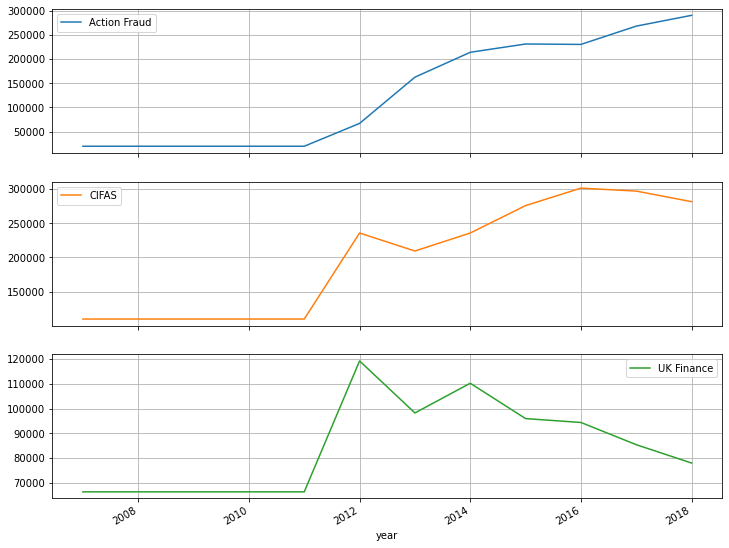

In [127]:
selected_list = ["Action Fraud","CIFAS","UK Finance"]
df_yt.fillna(method = "bfill").loc[:,selected_list].drop(index = 'mean').\
                                plot(figsize = [12,10], subplots = True,grid = True);

## Most highlights during the years 2007 to 2018:

1) Action Fraud increased from lower than 50,000 in 2011 to nearly 300,000 in 2018.

2) CIFAS showed a similar behavior and reached its maximum of 300,000 in years 2015 and 2016 and it fell slightly to 280,000 in 2018.

3) UK Finance however decreased from 120,000 in 2012 to 80,000 in 2018. This crime is an exceptional case and as opposed to all other crimes it fell during this period of time.

# Regional Analysis of Crimes based on the Type of Crime

In [161]:
blocked_index = ["Fraud: Action Fraud","Fraud: CIFAS","Fraud: UK Finance"]
blocked_columns = ["Action Fraud","CIFAS","UK Finance","mean"]
df_rt = pd.crosstab(index = df.Region, columns = df.type_offence,
                    values = df.num_offence, aggfunc = "mean",
                    margins = True, margins_name = "mean").\
                    drop(index = blocked_index, columns = blocked_columns)
df_rt.head(15)

type_offence,All other theft offences,Bicycle theft,Criminal damage and arson,Death or serious injury caused by illegal driving,Domestic burglary,Drug offences,Fraud offences,Homicide,Miscellaneous crimes against society,Non-domestic burglary,...,Public order offences,Residential burglary,Robbery,Sexual offences,Shoplifting,Stalking and harassment,Theft from the person,Vehicle offences,Violence with injury,Violence without injury
Region,,,,,,,,,,,,,,,,,,,,,
British Transport Police,10635.666667,5150.708333,6871.791667,0.166667,2.062500,3372.812500,592.821429,2.937500,846.750000,536.750000,...,7907.729167,0.941176,652.208333,1032.708333,1977.708333,87.937500,7299.645833,1979.625000,2518.354167,4787.270833
East,7909.649306,1941.621528,10613.829861,10.888889,2970.590278,2560.940972,1066.791667,8.885417,924.506944,3328.722222,...,3034.104167,1512.970588,629.312500,1169.111111,5261.364583,1589.201389,909.687500,6795.413194,5650.135417,5129.156250
East Midlands,8501.587500,1581.304167,11448.450000,10.004167,3373.729167,2325.716667,940.642857,9.666667,908.758333,4026.050000,...,2346.133333,1507.847059,780.287500,1207.666667,5398.004167,1241.654167,980.716667,7223.354167,6561.108333,4395.937500
London,62067.333333,10000.052083,36878.510417,22.843750,24686.833333,27257.239583,10565.732143,63.479167,4750.062500,13816.031250,...,18152.750000,9208.676471,15941.875000,6221.812500,20686.614583,12938.260417,19130.614583,50790.458333,34804.750000,29482.302083
North East,7698.527778,1254.777778,13604.763889,6.965278,2424.916667,2547.347222,594.809524,9.354167,1027.215278,3436.048611,...,3661.541667,1480.823529,384.395833,1196.118056,6405.111111,1951.965278,594.465278,5413.722222,6093.680556,4212.520833
North West,13687.304167,2165.600000,20780.141667,10.991667,6098.320833,5410.712500,1278.071429,19.491667,1543.400000,6098.400000,...,6487.904167,2957.717647,1595.608333,1988.020833,8462.845833,2739.087500,1920.750000,11901.495833,10595.100000,8270.737500
South East,16377.645833,3218.758333,19892.441667,17.904167,4432.820833,4501.254167,2003.985714,12.854167,1699.108333,6226.791667,...,5917.312500,2227.388235,961.812500,2347.879167,9972.241667,2866.841667,1765.554167,11467.279167,10963.633333,11082.287500
South West,8944.195833,1708.887500,12060.866667,9.650000,2699.966667,2734.058333,1152.121429,8.791667,815.250000,3964.420833,...,3653.258333,1194.670588,511.958333,1413.358333,5741.108333,1661.904167,862.625000,6452.912500,6949.275000,5497.450000
Wales,6276.244792,818.359375,10074.489583,7.182292,1945.921875,2868.947917,564.883929,7.546875,776.692708,2872.583333,...,3134.072917,906.720588,231.755208,997.000000,4260.098958,1619.598958,594.468750,5398.645833,5534.640625,3702.250000


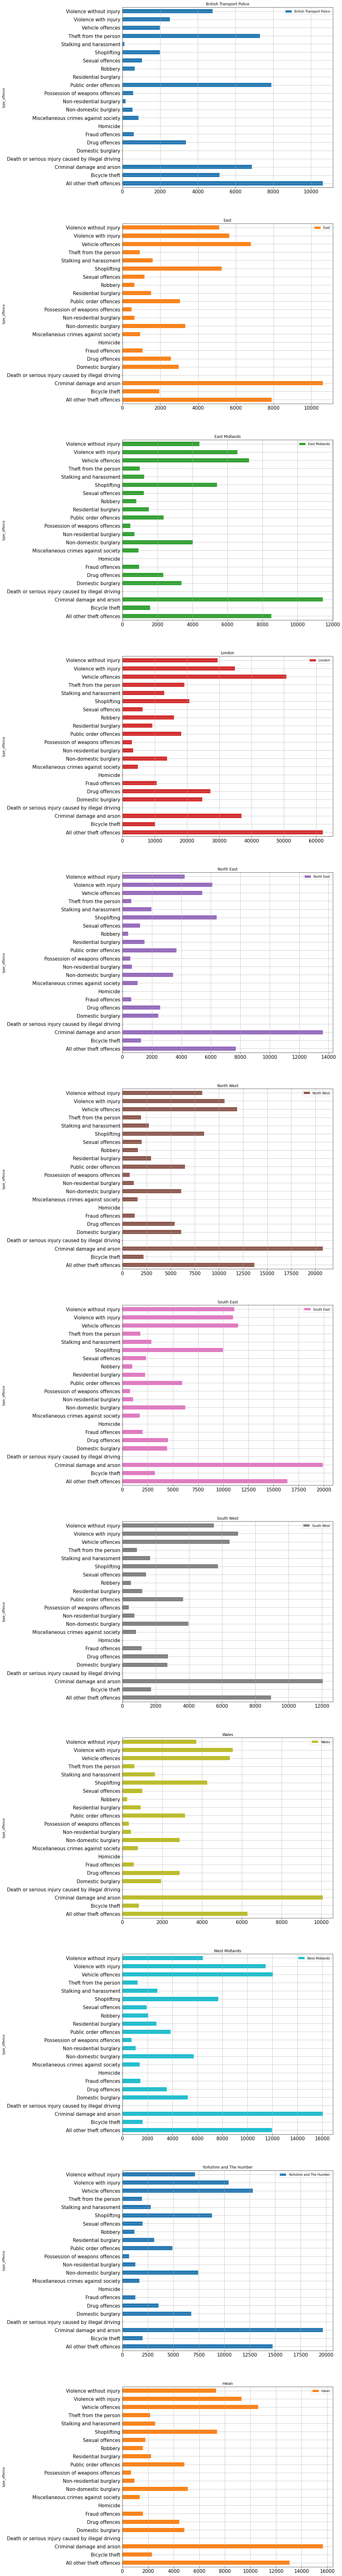

In [162]:
df_rt.T.plot(kind = 'barh', figsize = [12,150], subplots = True,
             grid = True, fontsize = 15, sharex = False, stacked = True);

## Highlights:

1) The most common crimes in all regions are "Criminal Damage and Arson", "Violence with and without Injury", "Vehicle Offences" and "Shoplifting".
Almost all of the regions are showing these crimes to be the most common.
2) The least common crimes are "Illegal Driving", "Possession of Weapon" and "Homocide".